# **Processamento de dados**



## **Base de dados de crédito**

**IMPORTS QUE VAMOS UTILIZAR**


In [ ]:
#BIBLIOTECAS PARA TRATAMENTO DE DADOS
import pandas as pd
import numpy as np
#BIBLIOTECAS PARA VIZUALIZAÇÃO DE GRÁFICOS
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


**VISUALIZAÇÃO DE DADOS E OUTLIERS**

In [ ]:
base_credit = pd.read_csv('/content/credit_data.csv')

In [ ]:
base_credit

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[2000 rows x 5 columns]

In [ ]:
base_credit.describe()

clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

In [ ]:
np.unique(base_credit['default'], return_counts=True)


(array([0, 1]), array([1717,  283]))

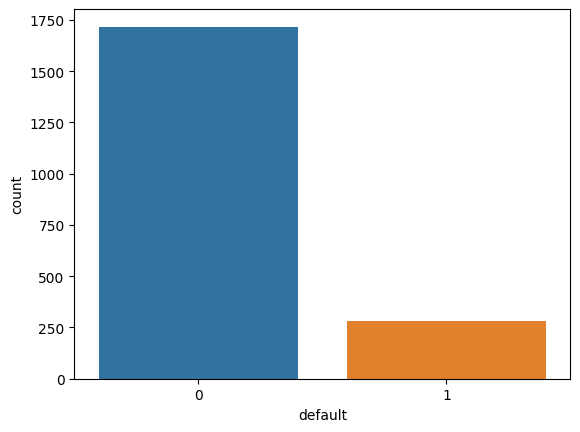

In [ ]:
sns.countplot(x=base_credit['default']);

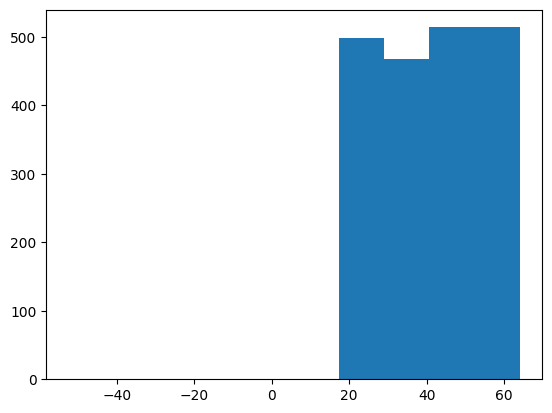

In [ ]:
plt.hist(base_credit['age']);

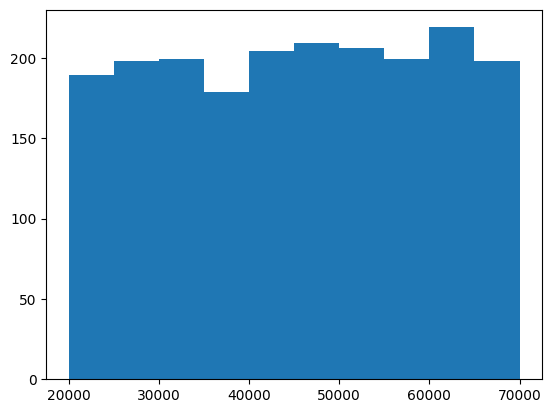

In [ ]:
plt.hist(base_credit['income']);

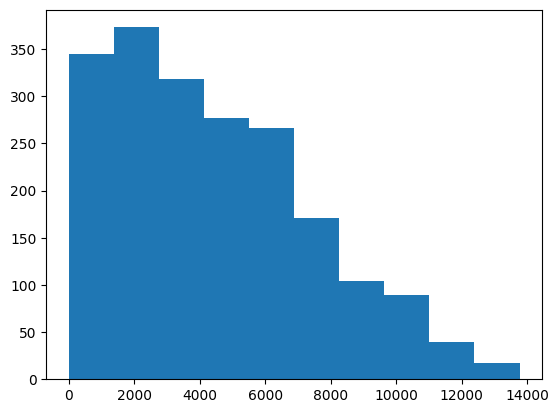

In [ ]:
plt.hist(base_credit['loan']);

In [ ]:
grafico_dispersão = px.scatter_matrix(base_credit, dimensions = ['age','income','loan'], color = 'default')
grafico_dispersão.show()

**TRATAMENTO DE DADOS E INCONSISTÊNCIAS**

In [ ]:
base_credit[base_credit['age'] < 0]

clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [ ]:
new_base_credit = base_credit.drop(base_credit[base_credit['age'] < 0].index)
new_base_credit

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[1997 rows x 5 columns]

In [ ]:
#tratamento de falores inválidos

In [ ]:
base_credit['age'][base_credit['age'] > 0].mean()

40.92770044906149

In [ ]:
base_credit.loc[base_credit['age'] < 0,'age'] = 40.92
base_credit.head()

clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0
3         4  42709.534201  45.751972  6103.642260        0
4         5  66952.688845  18.584336  8770.099235        1

In [ ]:
#tratamento de valores faltantes

In [ ]:
base_credit.isnull()

clientid  income    age   loan  default
0        False   False  False  False    False
1        False   False  False  False    False
2        False   False  False  False    False
3        False   False  False  False    False
4        False   False  False  False    False
...        ...     ...    ...    ...      ...
1995     False   False  False  False    False
1996     False   False  False  False    False
1997     False   False  False  False    False
1998     False   False  False  False    False
1999     False   False  False  False    False

[2000 rows x 5 columns]

In [ ]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
#OBSERVA-SE QUE EXISTEM 3 VALORES FALTANTES NA COLUNA 'age'

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

In [ ]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [ ]:
base_credit.loc[base_credit['clientid'].isin([28,30,31])]

clientid        income        age          loan  default
27        28  45727.459870  55.839922   6376.822949        0
29        30  58842.891308  54.510948  10871.186790        0
30        31  48528.852796  40.927689   6155.784670        0

**NESTA ETAPA VAMOS SEPARAR OS VALORES PARA O TREINAMENTO DA 'IA' (previsores e classe)**

In [ ]:
# Os previsores serão chamados de 'X', ja as classes serão chamadas de 'Y'

x_credit = base_credit.iloc[:, 1:4].values
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

**NESTA ETAPA APLICAREMOS A PADRONIZAÇÃO NOS DADOS PARA QUE OS VALORES FIQUEM NA MESMA ESCALA, ASSIM OTIMIZANDO NOSSA 'IA'**

**PARA ISSO UTILIZAREMOS O StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [ ]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

#Agora pode-se visualizar os valores em uma escala padronizada

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [ ]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

## **Base de dados de Censo (estimativa salarial)**

**IMPORTS QUE VAMOS UTILIZAR**

In [ ]:
#BIBLIOTECAS PARA TRATAMENTO DE DADOS
import pandas as pd
import numpy as np
#BIBLIOTECAS PARA VIZUALIZAÇÃO DE GRÁFICOS
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

**VISUALIZAÇÃO DE DADOS E OUTLIERS**

In [ ]:
base_census = pd.read_csv('/content/census.csv')
base_census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [ ]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [ ]:
base_census.isnull().sum()
#observa-se que não possuimos valores faltantes

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [ ]:
np.unique(base_census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

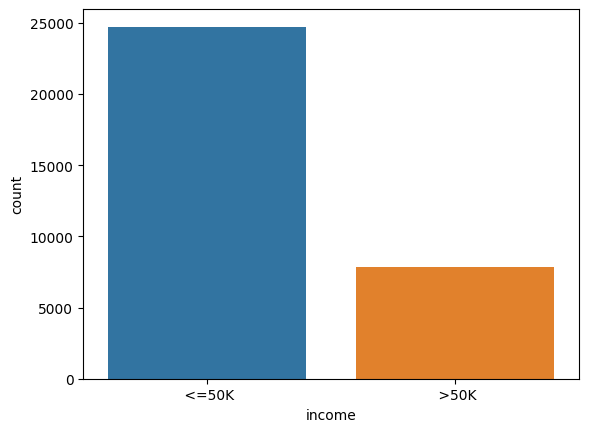

In [ ]:
sns.countplot(x=base_census['income']);

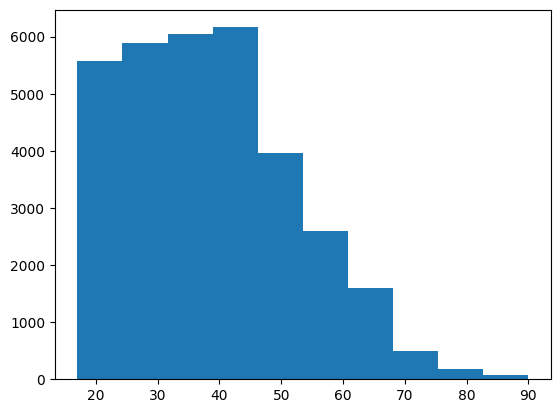

In [ ]:
plt.hist(base_census['age']);

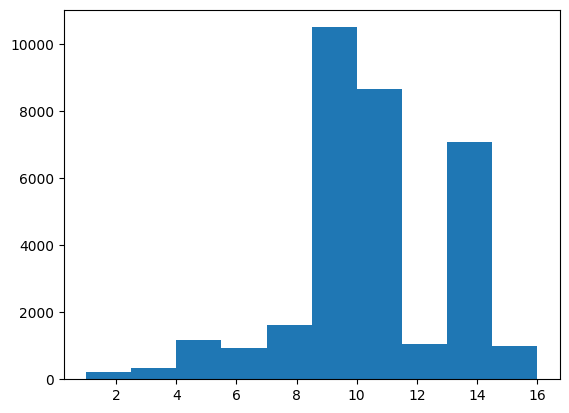

In [ ]:
plt.hist(base_census['education-num']);

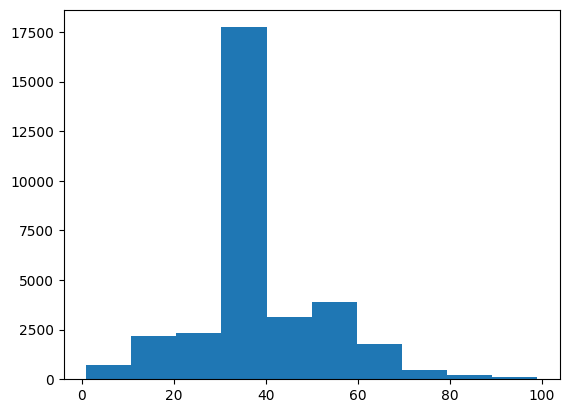

In [ ]:
plt.hist(base_census['hour-per-week']);

In [ ]:
grafico1 = px.treemap(base_census, path=['workclass','age'])
grafico1

In [ ]:
grafico2 = px.treemap(base_census, path=['occupation','relationship'])
grafico2

In [ ]:
grafico3 = px.parallel_categories(base_census, dimensions = ['occupation','relationship'])
grafico3

In [ ]:
grafico4 = px.parallel_categories(base_census, dimensions = ['workclass','income','occupation'])
grafico4

In [ ]:
grafico5 = px.parallel_categories(base_census, dimensions = ['income','education'])
grafico5

**NESTA ETAPA VAMOS SEPARAR OS VALORES PARA O TREINAMENTO DA 'IA' (previsores e classe)**

In [ ]:
# Os previsores serão chamados de 'X', ja as classes serão chamadas de 'Y'
x_census = base_census.iloc[:, 0:14].values
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
y_census = base_census.iloc[:,14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

TRATAMENTO DE ATRIBUTOS CATEGÓRICOS
(nesta etapa vamos tratar os dados categóricos para que sejam transformados em dados numéricos)

In [ ]:
#para isso utilizaremos o LabelEncoder

from sklearn.preprocessing import LabelEncoder

In [ ]:
#EXEMPLO DE FUNCIONAMENTO

In [ ]:
x_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [ ]:
teste = LabelEncoder().fit_transform(x_census[:,1])
teste
#OBSERVE QUE ELE TRANSFORMOU AS VARIÁVEIS CATEGÓRICAS EM NÚMEROS PARA QUE POSSAM SER TRABALHADAS

array([7, 6, 4, ..., 4, 4, 5])

In [ ]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

In [ ]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

**OneHotEncoder**

In [ ]:
#exemplo de funcionamento:

# Carro

''' Gol Pálio Uno
     1     2   3

Gol   1 0 0
Pálio 0 1 0
Uno   0 0 1 # encode'''

' Gol Pálio Uno\n     1     2   3\n\nGol   1 0 0\nPálio 0 1 0\nUno   0 0 1 # encode'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [ ]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()

In [ ]:
x_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
x_census.shape

(32561, 108)

**StandardScaler**

In [ ]:
x_census = StandardScaler().fit_transform(x_census)

In [ ]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

## **Divisão das Bases de Treinamento**

In [ ]:
from sklearn.model_selection import train_test_split

### Base de dados dos créditos

In [ ]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit,y_credit, test_size = 0.25, random_state = 0)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

### Base de Crédito dos Census

In [ ]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census,y_census, test_size = 0.15, random_state = 0)

In [ ]:
x_census_treinamento.shape,y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape,y_census_teste.shape

((4885, 108), (4885,))

##**Salvar as variáveis**

Para isso vamos utilizar a biblioteca pickle

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f)

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f)

## **Base de Dados Risco de Crédito**

In [ ]:
risco_crédito = pd.read_csv('/content/risco_credito.csv')

In [ ]:
risco_crédito

historia divida garantias     renda     risco
0           ruim   alta   nenhuma      0_15      alto
1   desconhecida   alta   nenhuma     15_35      alto
2   desconhecida  baixa   nenhuma     15_35  moderado
3   desconhecida  baixa   nenhuma  acima_35      alto
4   desconhecida  baixa   nenhuma  acima_35     baixo
5   desconhecida  baixa  adequada  acima_35     baixo
6           ruim  baixa   nenhuma      0_15      alto
7           ruim  baixa  adequada  acima_35  moderado
8            boa  baixa   nenhuma  acima_35     baixo
9            boa   alta  adequada  acima_35     baixo
10           boa   alta   nenhuma      0_15      alto
11           boa   alta   nenhuma     15_35  moderado
12           boa   alta   nenhuma  acima_35     baixo
13          ruim   alta   nenhuma     15_35      alto

In [ ]:
x_risco_credito = risco_crédito.iloc[:, 0:4].values
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
y_risco_credito = risco_crédito.iloc[:,4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantias = LabelEncoder()
label_encoder_renda = LabelEncoder()


In [ ]:
x_risco_credito[:,0] = label_encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_encoder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_encoder_garantias.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_encoder_renda.fit_transform(x_risco_credito[:,3])

In [ ]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
import pickle

with open('risco_credito.pkl','wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f)

**# Aprendizagem Bayesiana**

 **Esse algoritmo de IA ele trabalha única e exclusivamente com probabilidade para a sua execução**

**vamos testa-lo em 3 bancos de dados, são eles o risco de crédito, no banco de census e por fim no banco de crédito**

**imports **

In [ ]:
from sklearn.naive_bayes import GaussianNB

# **Algoritmos**:

# **Algoritmo Nayve Bayes**

## **Aplicação na base de dados do Rísco de Crédito**

In [ ]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito,y_risco_credito)

GaussianNB()

In [ ]:
'''Situações experimentais, ops veja que substituimos as variáveis categoricas por inteiros,
devemos interpretar e na hora de inserir colocar ela como um inteiro'''
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [ ]:
previsao
'''aqui podemos observar a resposta da IA em relaçao ao risco de conceder crédito para cada ocasião
sendo a primeira "baixo" e a segunda "moderado" '''

'aqui podemos observar a resposta da IA em relaçao ao risco de conceder crédito para cada ocasião\nsendo a primeira "baixo" e a segunda "moderado" '

In [ ]:
naive_risco_credito.classes_
# com essa função podemos ver as classes possíveis

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.class_count_
# com essa função podemos ver os registros feitos de cada uma

array([6., 5., 3.])

In [ ]:
naive_risco_credito.class_prior_
# esta função nos da as porcentagens a priori

array([0.42857143, 0.35714286, 0.21428571])

## **Aplicação na base de dados do Crédito**

In [ ]:
with open ('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
# relembrando
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
treinamento_ia_credit = GaussianNB()
treinamento_ia_credit.fit(x_credit_treinamento,y_credit_treinamento)

GaussianNB()

In [ ]:
previsoes = treinamento_ia_credit.predict(x_credit_teste)
previsoes
# Abaixo ja temos as repostas dadas pela IA

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste
#real base de dados

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**imports para calcular a daixa de acerto**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [ ]:
acerto = accuracy_score(y_credit_teste, previsoes)*100

In [ ]:
print('seu algoritmo tem a precisão de', acerto ,'%, parabéns')

seu algoritmo tem a precisão de 93.8 %, parabéns


In [ ]:
confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.938

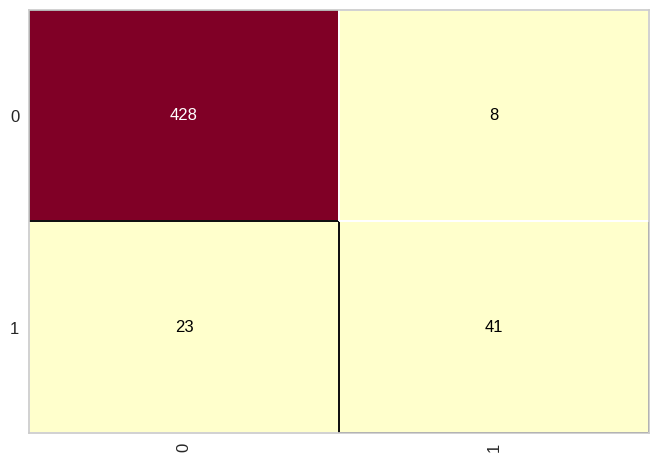

In [ ]:
cm = ConfusionMatrix(treinamento_ia_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500




## **Aplicação na base de dados do Census**

In [ ]:
with open ('census.pkl','rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
# relembrando
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
treinamento_ia_census = GaussianNB()
treinamento_ia_census.fit(x_census_treinamento,y_census_treinamento)

GaussianNB()

In [ ]:
previsoes2 = treinamento_ia_census.predict(x_census_teste)
previsoes2

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
acerto_census = accuracy_score(y_census_teste, previsoes2)*100
acerto_census

47.67656090071648

In [ ]:
print('seu algoritmo tem a precisão de', acerto_census ,'%, parabéns')

seu algoritmo tem a precisão de 47.67656090071648 %, parabéns


In [ ]:
confusion_matrix(y_census_teste, previsoes2)

array([[1172, 2521],
       [  35, 1157]])

0.4767656090071648

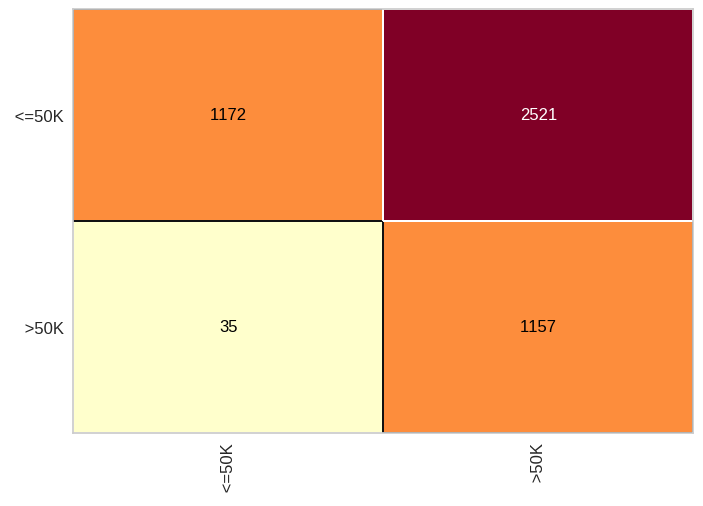

In [ ]:
cm = ConfusionMatrix(treinamento_ia_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes2))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



#**Árvore de Decisão**


**vantagens**
1. fácil interpretação

2. **não precisa de normalização ou padronização**

3.  rapida para classificar novos registros



**Desvantagens**


1.   pode gerar árvores muito complexas

2.   pequenas mudanças na árvore pode alterar o resultado






Pode ser usado para **classificação** ou **regressão**


CART (classification and regression trees)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

## **Aplicação na base de dados do Rísco de Crédito**

In [ ]:
import pickle

with open('risco_credito.pkl','rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
arvore_risco_credito.feature_importances_
#os valores abaixo são as importancias de cada classe da tabela

array([0.48015651, 0.03885431, 0.03885431, 0.44213486])

In [ ]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

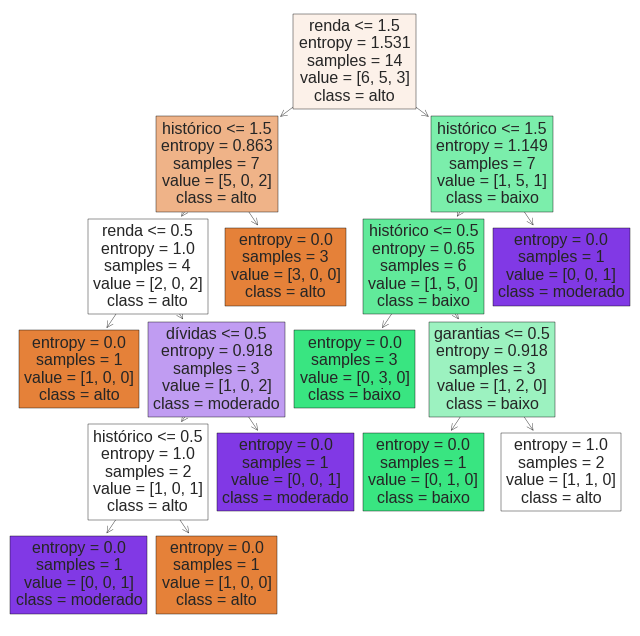

In [ ]:

previsores = ['histórico','dívidas','garantias','renda']
figura, eixos = plt.subplots(nrows=1,ncols=1,figsize = (8,8))
tree.plot_tree(arvore_risco_credito, feature_names= previsores, class_names = arvore_risco_credito.classes_,filled=True);

In [ ]:
'''ops veja que substituimos as variáveis categoricas por inteiros,
devemos interpretar e na hora de inserir colocar ela como um inteiro'''
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

## **Aplicação na base de dados do Crédito**

In [ ]:
with open ('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape,y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
 x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state= 0)

In [ ]:
arvore_credit.fit( x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

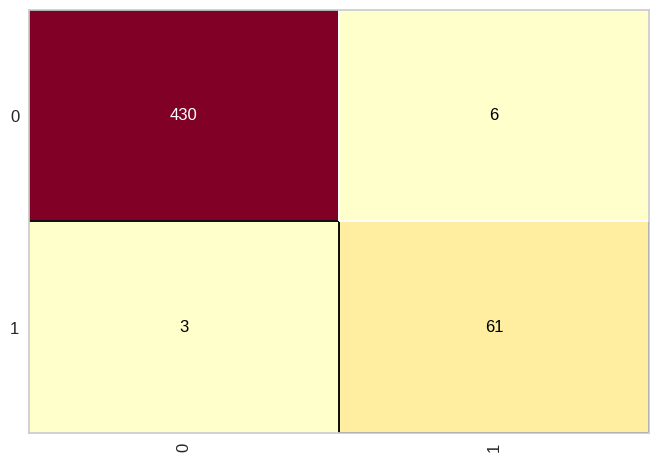

In [ ]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



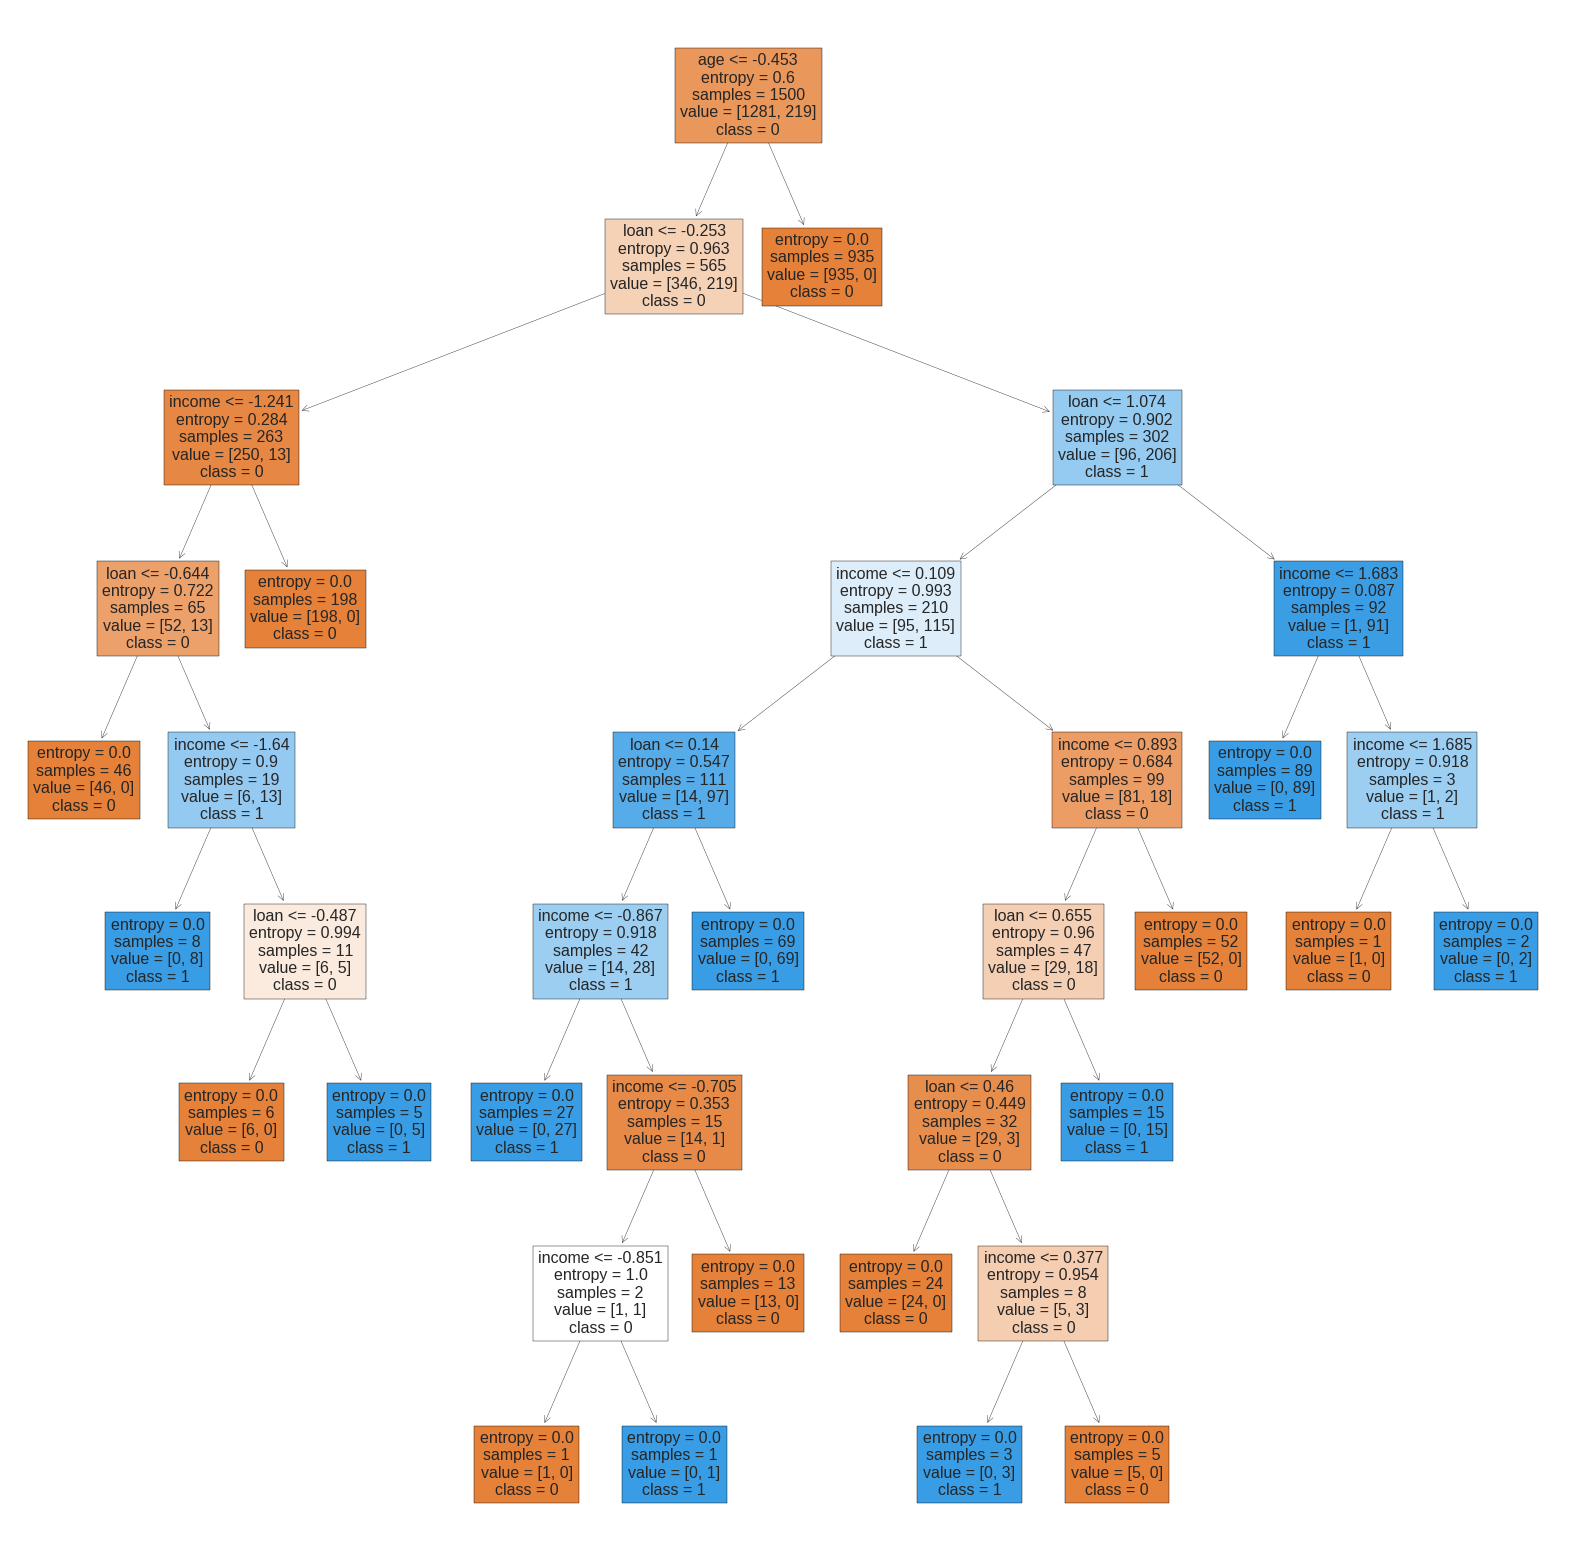

In [ ]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

## **Aplicação na base de dados do Census**

In [ ]:
with open ('census.pkl','rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
# relembrando
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
arvore_census = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore_census.fit(x_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

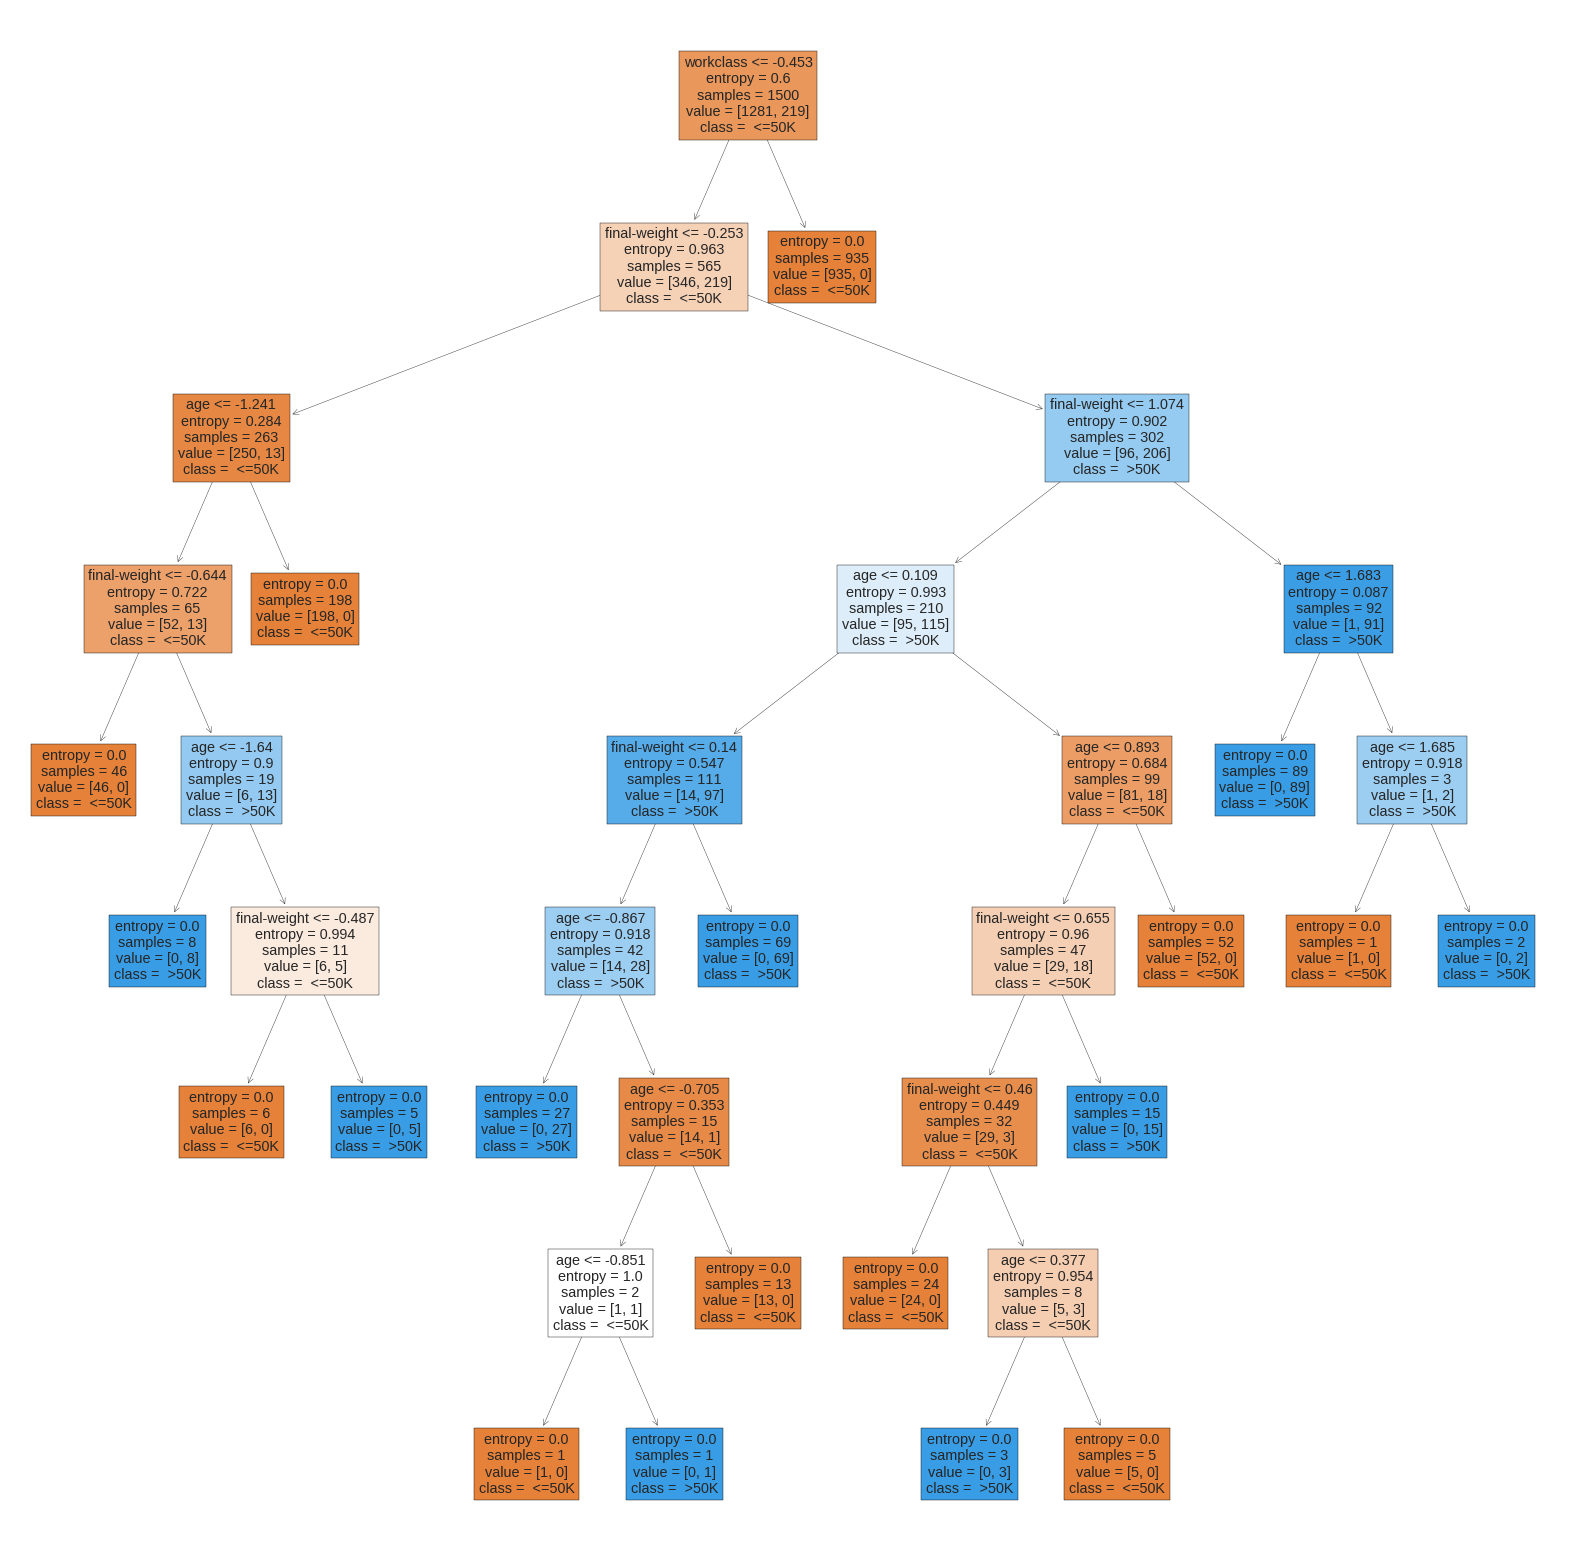

In [ ]:
previsores = ['age', 'workclass', 'final-weight','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loos','hour-per-week','native-country']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=[' <=50K', ' >50K'], filled=True);
fig.savefig('arvore_census.png')

In [ ]:
arvore_census.classes_

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
accuracy_score(y_census_teste,previsoes)

0.8104401228249745

0.8104401228249745

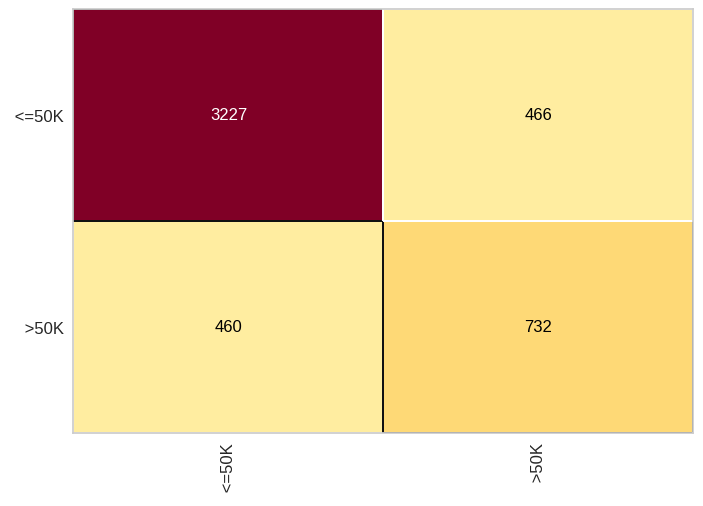

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# **Random Forest**

Esse algoritmo é baseado em arvores de decisão, porém ele **gera diversas párvores para tomar a decição ao invéz de apenas uma**

**essa classe da biblioteca do sklearn** *ensemble* **serve para combinar algoritmos de IA**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import pickle

## **Aplicação na base de dados do Rísco de Crédito**

In [ ]:
with open ('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape,y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
 x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

**a baixo no critério *n_estimators*, temos o número de árvores que serão feitas para avaliar o caso**

In [ ]:
random_forest_credit = RandomForestClassifier(n_estimators=40,criterion= 'entropy', random_state = 0 )
random_forest_credit.fit(x_credit_treinamento,y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [ ]:
previsoes = random_forest_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
accuracy_score(y_credit_teste,previsoes)

0.984

0.984

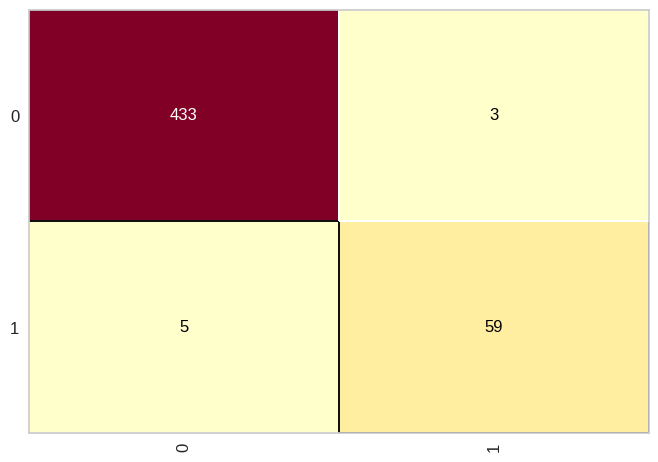

In [ ]:
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



## **Aplicação na base de dados do Census**

In [ ]:
with open ('census.pkl','rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
y_census_treinamento

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators = 110, criterion = 'entropy', random_state = 0)
random_forest_census.fit(x_census_treinamento,y_census_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=110, random_state=0)

In [ ]:
previsoes = random_forest_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_teste,previsoes)

0.8515864892528148

0.8515864892528148

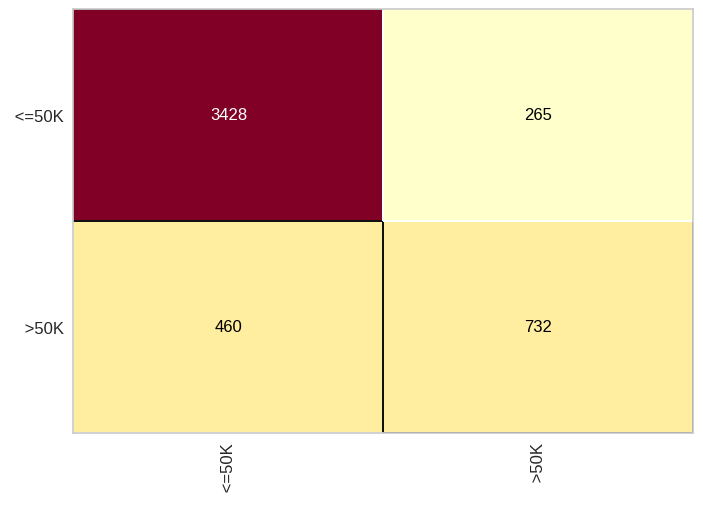

In [ ]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



# **Prendizagem por instâncias (KMM)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## **Base de Dados Crédito**

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
 x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
knn_credit = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski', p = 2)
knn_credit.fit( x_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [ ]:
previsoes = knn_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_teste,previsoes)

0.986

0.986

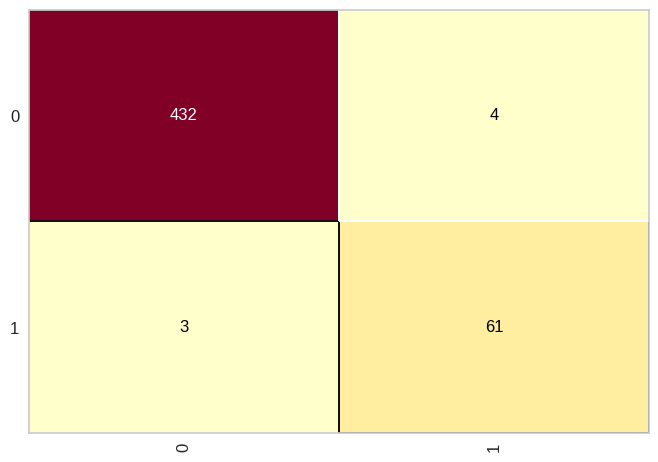

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(knn_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



## **Aplicação na base de dados do Census**

In [ ]:
import pickle
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
knn_census = KNeighborsClassifier(n_neighbors = 21)
knn_census.fit( x_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
previsoes = knn_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_score(y_census_teste,previsoes)

0.8309109518935517

0.8309109518935517

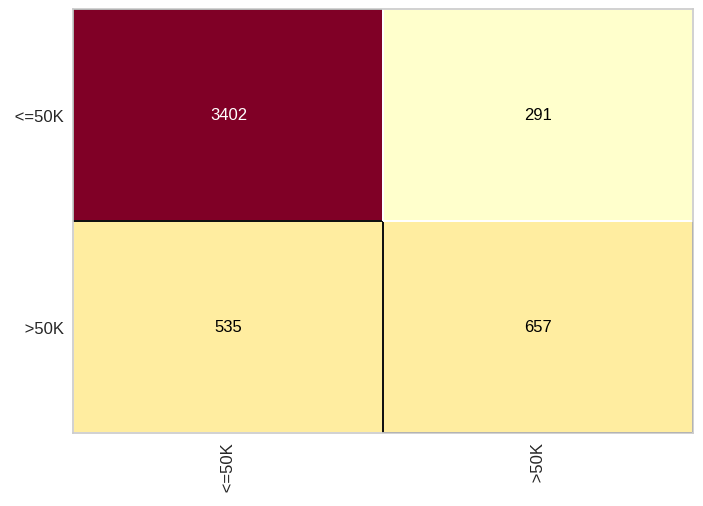

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(knn_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      3693
        >50K       0.69      0.55      0.61      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.74      0.75      4885
weighted avg       0.82      0.83      0.82      4885



# **Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression

## **Base de Dados  Risco Crédito**

In [ ]:
import pickle
with open('risco_credito.pkl','rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
x_risco_credito = np.delete(x_risco_credito, [2, 7, 11], axis = 0)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis = 0)
#o segundo parâmetro representa os indices que serão apagados e o "axis" representa se será colunas(1) ou linhas (0)

In [ ]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [ ]:
logistic_risco_credito = LogisticRegression(random_state = 1)
logistic_risco_credito.fit(x_risco_credito,y_risco_credito)



LogisticRegression(random_state=1)

In [ ]:
logistic_risco_credito.intercept_

array([-0.80828993])

In [ ]:
logistic_risco_credito.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [ ]:
'''ops veja que substituimos as variáveis categoricas por inteiros,
devemos interpretar e na hora de inserir colocar ela como um inteiro'''
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes1 = logistic_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

## **Base de Dados Crédito**

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
 x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
 x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
logistic_credit = LogisticRegression(random_state= 1)
logistic_credit.fit(x_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [ ]:
logistic_credit.intercept_

array([-6.02976095])

In [ ]:
logistic_credit.coef_

array([[-2.54927091, -3.72279861,  3.93940349]])

In [ ]:
previsao = logistic_credit.predict(x_credit_teste)
previsao

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


In [ ]:
accuracy_score(y_credit_teste,previsao)

0.946

0.946

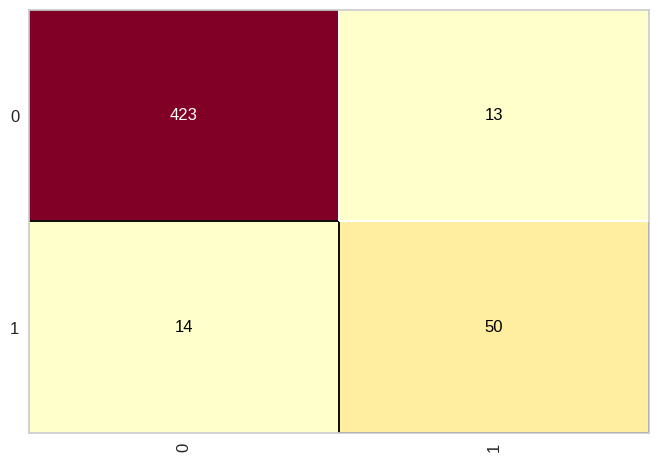

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsao))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



## **Aplicação na base de dados do Census**

In [ ]:
import pickle
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
regressão_census = LogisticRegression(random_state = 1)
regressão_census.fit(x_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [ ]:
previsoes = regressão_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_score(y_census_teste,previsoes)

0.849539406345957

0.849539406345957

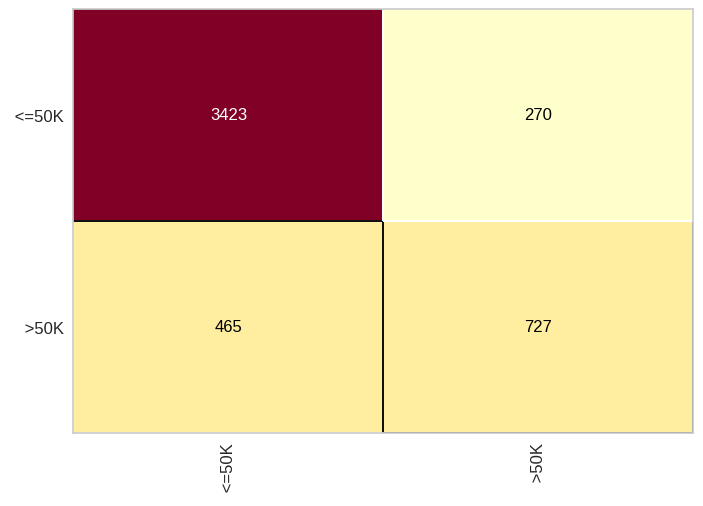

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(regressão_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



# **SVM (máquinas de vetores de suporte)**

## **Base de Dados Crédito**

In [ ]:
from sklearn.svm import SVC

In [ ]:
with open ('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 2)
svm_credit.fit(x_credit_treinamento,y_credit_treinamento)

SVC(C=2, random_state=1)

In [ ]:
previsoes = svm_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.988

0.988

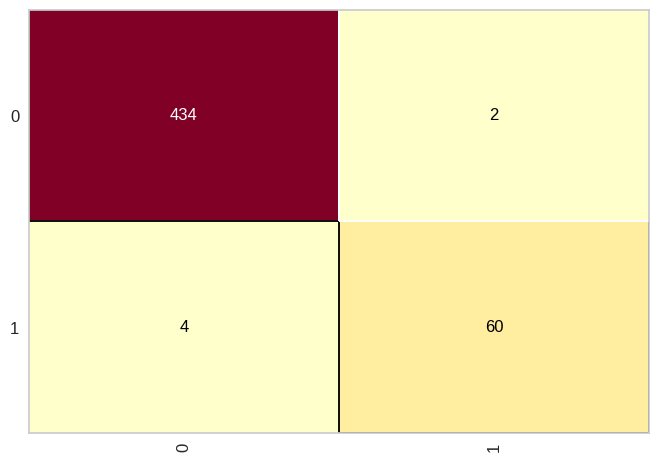

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



## **Base de Dados do Census**

In [ ]:
import pickle
from sklearn.svm import SVC
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
svm_census = SVC(kernel='linear', random_state=1, C = 2)


In [ ]:
svm_census.fit(x_census_treinamento,y_census_treinamento)

SVC(C=2, kernel='linear', random_state=1)

In [ ]:
previsoes = svm_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_score(y_census_teste,previsoes)

0.8509723643807574

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

0.8509723643807574

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



# **Redes Neurais Artificiais**

In [ ]:
from sklearn.neural_network import MLPClassifier

## **Base Crédito**

In [ ]:
import pickle
with open ('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
rede_neural_credit = MLPClassifier(max_iter=1000, verbose = True, tol = 0.0000050, solver = 'adam', activation = 'relu', hidden_layer_sizes= (3,3))
rede_neural_credit.fit(x_credit_treinamento,y_credit_treinamento)

In [ ]:
previsoes = rede_neural_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste,previsoes)

0.998

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

0.998

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      1.00      0.99        64

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



## **Base de Dados Census**

In [ ]:
import pickle
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
rede_neural_census = MLPClassifier(max_iter=1000, verbose = True, tol = 0.0000050, solver = 'adam', activation = 'relu', hidden_layer_sizes= (55,55))
rede_neural_census.fit(x_census_treinamento,y_census_treinamento)

Iteration 1, loss = 0.38627192
Iteration 2, loss = 0.32658422
Iteration 3, loss = 0.31500842
Iteration 4, loss = 0.30809305
Iteration 5, loss = 0.30286097
Iteration 6, loss = 0.29899083
Iteration 7, loss = 0.29626240
Iteration 8, loss = 0.29326815
Iteration 9, loss = 0.29138311
Iteration 10, loss = 0.28842080
Iteration 11, loss = 0.28712101
Iteration 12, loss = 0.28428567
Iteration 13, loss = 0.28248198
Iteration 14, loss = 0.28060593
Iteration 15, loss = 0.28028193
Iteration 16, loss = 0.27812473
Iteration 17, loss = 0.27564178
Iteration 18, loss = 0.27431358
Iteration 19, loss = 0.27302345
Iteration 20, loss = 0.27168268
Iteration 21, loss = 0.26973416
Iteration 22, loss = 0.26799433
Iteration 23, loss = 0.26665623
Iteration 24, loss = 0.26501831
Iteration 25, loss = 0.26386940
Iteration 26, loss = 0.26313574
Iteration 27, loss = 0.26162338
Iteration 28, loss = 0.25989505
Iteration 29, loss = 0.25791460
Iteration 30, loss = 0.25664897
Iteration 31, loss = 0.25647592
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1000, tol=5e-06,
              verbose=True)

In [ ]:
previsoes = rede_neural_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste,previsoes)

0.8141248720573183

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

0.8141248720573183

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      3693
        >50K       0.64      0.55      0.59      1192

    accuracy                           0.81      4885
   macro avg       0.75      0.72      0.73      4885
weighted avg       0.81      0.81      0.81      4885



# **Avaliações dos Algoritmos**

*   Árvore de Decisão - 98.2%
*   Random Forest - 98.4%
*   Prendizagem por instâncias (KMM) - 98.6%
*   Regressão Logística - 94.6%
*   SVM (máquinas de vetores de suporte) - 98.8%
*   Redes Neurais Artificiais - 99.8%







## **Tuning dos Parâmetros com GridSearch**
## *Nesta seção vamos encontrar os melhores parâmetros para cada um dos algoritmos, para isso usaremos o GridSearch*

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
import pickle
with open ('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
x_credit = np.concatenate((x_credit_treinamento,x_credit_teste),axis = 0)

In [ ]:
x_credit.shape, x_credit

((2000, 3),
 array([[-1.3754462 ,  0.50631087,  0.10980934],
        [ 1.45826409, -1.6489393 , -1.21501497],
        [-0.79356829,  0.22531191, -0.43370226],
        ...,
        [ 1.37445674, -1.05746281, -1.12564819],
        [-1.57087737, -0.63488173, -0.36981671],
        [-1.03572293, -0.93978122,  0.04244312]]))

In [ ]:
y_credit = np.concatenate((y_credit_treinamento,y_credit_teste),axis = 0)

In [ ]:
y_credit.shape, y_credit

((2000,), array([0, 0, 0, ..., 0, 1, 1]))

### **Árvore de Decisão**

In [ ]:
parametros = {'criterion': ['gini','entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split' : [2, 5, 10],
              'min_samples_leaf' : [1, 5, 10]}

In [ ]:
GridSearch = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros)
GridSearch.fit(x_credit,y_credit)
melhores_parametros = GridSearch.best_params_
melhores_resultados = GridSearch.best_score_
print(melhores_parametros)
print(melhores_resultados)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


### **Random Forest**

In [ ]:
parametros = {'criterion': ['gini','entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split' : [2, 5, 10],
              'min_samples_leaf' : [1, 5, 10]}

In [ ]:
GridSearch = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parametros)
GridSearch.fit(x_credit,y_credit)
melhores_parametros = GridSearch.best_params_
melhores_resultados = GridSearch.best_score_
print(melhores_parametros)
print(melhores_resultados)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.9894999999999999


### **KNN**

In [ ]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p' : [1,2]}

In [ ]:
GridSearch = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=parametros)
GridSearch.fit(x_credit,y_credit)
melhores_parametros = GridSearch.best_params_
melhores_resultados = GridSearch.best_score_
print(melhores_parametros)
print(melhores_resultados)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


### **Regressão Logística**

In [ ]:
parametros = {'tol': [0.0001,0.00001,0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver' : ['lbfgs','sag','saga']}

In [ ]:
GridSearch = GridSearchCV(estimator = LogisticRegression(), param_grid=parametros)
GridSearch.fit(x_credit,y_credit)
melhores_parametros = GridSearch.best_params_
melhores_resultados = GridSearch.best_score_
print(melhores_parametros)
print(melhores_resultados)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


### **SVM**

In [ ]:
parametros = {'tol': [0.0001,0.00001,0.000001],
              'C': [1.0, 1.5, 2.0],
              'kernel' : ['rbf','linear','poly','sigmoid']}

In [ ]:
GridSearch = GridSearchCV(estimator = SVC(), param_grid=parametros)
GridSearch.fit(x_credit,y_credit)
melhores_parametros = GridSearch.best_params_
melhores_resultados = GridSearch.best_score_
print(melhores_parametros)
print(melhores_resultados)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.0001}
0.9829999999999999


### **Reedes Neurais Artificiais**

In [ ]:
parametros = {'activation': ['relu','logistisc','tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size' : [10, 56]}


In [ ]:
GridSearch = GridSearchCV(estimator = MLPClassifier(), param_grid=parametros)
GridSearch.fit(x_credit,y_credit)
melhores_parametros = GridSearch.best_params_
melhores_resultados = GridSearch.best_score_


In [ ]:
print(melhores_parametros)
print(melhores_resultados)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9970000000000001


## **Validação Cruzada**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultado_arvore = []
resultado_random_forest = []
resultado_KNN = []
resultado_regressao_logistica = []
resultado_svm = []
resultado_redes_neurais = []

for i in range (30):

  kfold = KFold(n_splits = 10, shuffle = True, random_state= i)

  arvore = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 1,min_samples_split = 5, splitter = 'best')
  scores = cross_val_score(arvore, x_credit, y_credit, cv = kfold)
  resultado_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
  scores = cross_val_score(random_forest, x_credit, y_credit, cv = kfold)
  resultado_random_forest.append(scores.mean())

  KNN = KNeighborsClassifier(n_neighbors = 20, p = 1)
  scores = cross_val_score(KNN, x_credit, y_credit, cv = kfold)
  resultado_KNN.append(scores.mean())

  regressao_logistica = LogisticRegression(C = 1,solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(regressao_logistica, x_credit, y_credit, cv = kfold)
  resultado_regressao_logistica.append(scores.mean())

  SVM = SVC(C = 2,kernel = 'rbf', tol= 0.0001)
  scores = cross_val_score(SVM, x_credit, y_credit, cv = kfold)
  resultado_svm.append(scores.mean())

  redes_neurais = MLPClassifier(activation = 'relu',batch_size = 10, solver = 'adam')
  scores = cross_val_score(redes_neurais, x_credit, y_credit, cv = kfold)
  resultado_redes_neurais.append(scores.mean())

In [ ]:
s = sum(resultado_redes_neurais)
print(s/len(resultado_redes_neurais))

0.9965666666666668


**Salvando** em **DataFrame** os resultados obtidos

In [ ]:
resultados  = pd.DataFrame({'Árvore de Decisão': resultado_arvore,'Random Forest' : resultado_random_forest,
                            'KNN': resultado_KNN,'Regrssão Logística': resultado_regressao_logistica, 'SVM': resultado_svm,
                            'Redes Neuraris' : resultado_redes_neurais})
resultados

Árvore de Decisão  Random Forest     KNN  Regrssão Logística     SVM  \
0              0.9870         0.9875  0.9800              0.9475  0.9845   
1              0.9860         0.9870  0.9800              0.9465  0.9840   
2              0.9905         0.9890  0.9800              0.9470  0.9865   
3              0.9875         0.9875  0.9800              0.9460  0.9850   
4              0.9885         0.9885  0.9810              0.9465  0.9850   
5              0.9885         0.9890  0.9785              0.9465  0.9845   
6              0.9885         0.9900  0.9800              0.9470  0.9860   
7              0.9875         0.9865  0.9805              0.9480  0.9850   
8              0.9865         0.9865  0.9810              0.9465  0.9840   
9              0.9875         0.9880  0.9810              0.9465  0.9845   
10             0.9860         0.9860  0.9780              0.9475  0.9840   
11             0.9895         0.9885  0.9805              0.9480  0.9845   
12             0.9885         0.9875  0.9810              0.9475  0.9855   
13             0.9870         0.9870  0.9800              0.9475  0.9850   
14             0.9840         0.9845  0.9795              0.9485  0.9830   
15             0.9860         0.9850  0.9795              0.9475  0.9865   
16             0.9855         0.9855  0.9805              0.9460  0.9860   
17             0.9905         0.9890  0.9830              0.9470  0.9865   
18             0.9875         0.9890  0.9800              0.9465  0.9850   
19             0.9870         0.9870  0.9805              0.9465  0.9845   
20             0.9830         0.9880  0.9800              0.9465  0.9840   
21             0.9865         0.9880  0.9810              0.9470  0.9850   
22             0.9885         0.9895  0.9810              0.9455  0.9865   
23             0.9870         0.9880  0.9800              0.9465  0.9875   
24             0.9875         0.9885  0.9835              0.9470  0.9870   
25             0.9880         0.9860  0.9815              0.9470  0.9820   
26             0.9880         0.9870  0.9795              0.9475  0.9840   
27             0.9860         0.9865  0.9795              0.9465  0.9865   
28             0.9860         0.9865  0.9775              0.9480  0.9835   
29             0.9885         0.9845  0.9780              0.9465  0.9865   

    Redes Neuraris  
0           0.9970  
1           0.9960  
2           0.9955  
3           0.9950  
4           0.9965  
5           0.9970  
6           0.9965  
7           0.9965  
8           0.9955  
9           0.9970  
10          0.9960  
11          0.9970  
12          0.9960  
13          0.9970  
14          0.9970  
15          0.9985  
16          0.9955  
17          0.9965  
18          0.9970  
19          0.9980  
20          0.9975  
21          0.9955  
22          0.9965  
23          0.9970  
24          0.9970  
25          0.9965  
26          0.9965  
27          0.9960  
28          0.9970  
29          0.9965

In [ ]:
resultados.describe()

Árvore de Decisão  Random Forest        KNN  Regrssão Logística  \
count          30.000000      30.000000  30.000000           30.000000   
mean            0.987283       0.987367   0.980200            0.946950   
std             0.001638       0.001444   0.001270            0.000687   
min             0.983000       0.984500   0.977500            0.945500   
25%             0.986125       0.986500   0.979625            0.946500   
50%             0.987500       0.987500   0.980000            0.947000   
75%             0.988500       0.988500   0.981000            0.947500   
max             0.990500       0.990000   0.983500            0.948500   

             SVM  Redes Neuraris  
count  30.000000       30.000000  
mean    0.985067        0.996567  
std     0.001278        0.000763  
min     0.982000        0.995000  
25%     0.984125        0.996000  
50%     0.985000        0.996500  
75%     0.986375        0.997000  
max     0.987500        0.998500

In [ ]:
alpha  = 0.05
#confiabilidade do teste (confiança de 95%)

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultado_arvore),shapiro(resultado_random_forest),shapiro(resultado_KNN),shapiro(resultado_regressao_logistica),shapiro(resultado_svm),shapiro(resultado_redes_neurais)

(ShapiroResult(statistic=0.957905650138855, pvalue=0.2735833525657654),
 ShapiroResult(statistic=0.9697957038879395, pvalue=0.5335999727249146),
 ShapiroResult(statistic=0.9244037866592407, pvalue=0.0349433459341526),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9581338763237, pvalue=0.27733635902404785),
 ShapiroResult(statistic=0.9379916787147522, pvalue=0.0803154781460762))

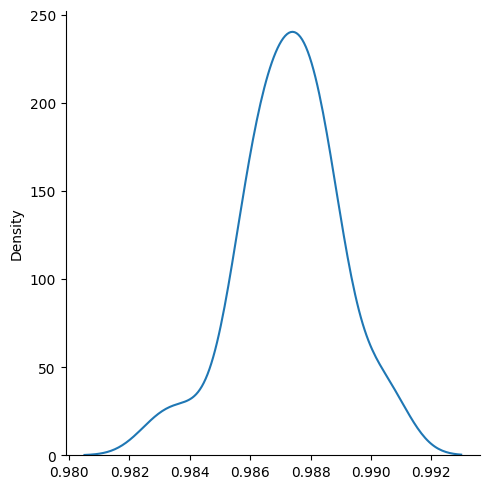

In [ ]:
sns.displot(resultado_arvore,kind = 'kde')

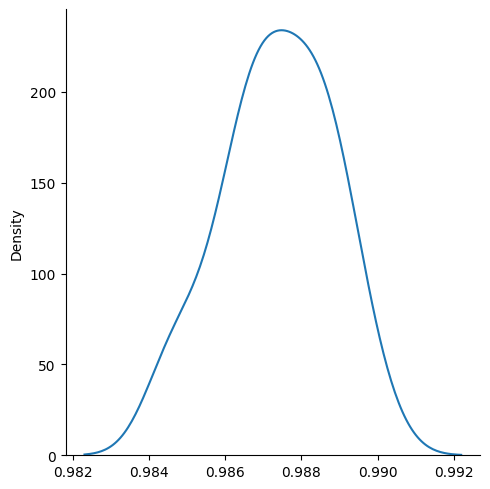

In [ ]:
sns.displot(resultado_random_forest,kind = 'kde')

In [ ]:
sns.displot(resultado_KNN,kind = 'kde')

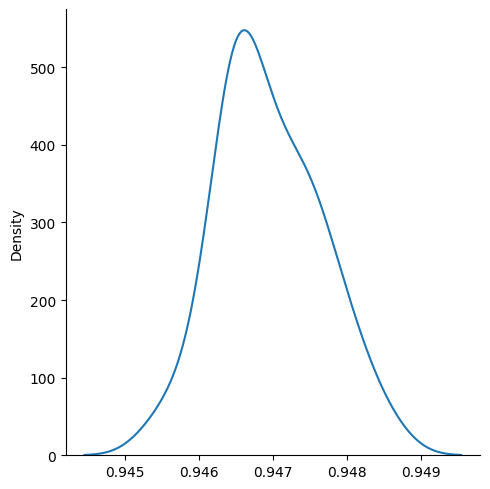

In [ ]:
sns.displot(resultado_regressao_logistica,kind = 'kde')

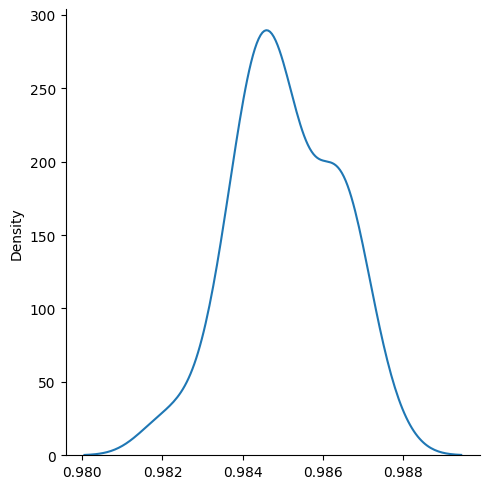

In [ ]:
sns.displot(resultado_svm,kind = 'kde')

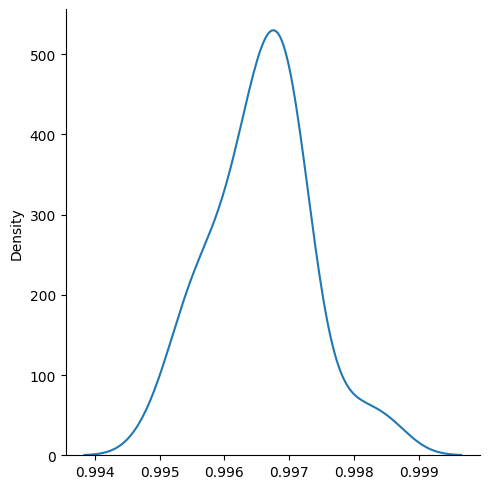

In [ ]:
sns.displot(resultado_redes_neurais,kind = 'kde')

### Teste de hipótese com ANOVA e Tukey

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultado_arvore,resultado_random_forest,resultado_KNN,resultado_regressao_logistica,resultado_svm,resultado_redes_neurais)
p

2.161286022279928e-192

In [ ]:
alpha = 0.05
if p<=alpha:
  print('Hipótese nula rejeitada. Os dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Os dados são iguais')

Hipótese nula rejeitada. Os dados são diferentes


Como os dados são diferentes ultilizaremos o algoritmo de Tukey para saber qual o melhor, se fossem iguais não importaria qual algoritmo que seria ultilizado, o resultado seria bem semelhante

In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultado_arvore, resultado_random_forest, resultado_KNN, resultado_regressao_logistica, resultado_svm, resultado_redes_neurais]),
                         'algoritmo': ['Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão','Árvore de Decisão',
                          'Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest',
                          'KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN',
                          'Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística','Regrssão Logística',
                          'SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM',
                          'Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris','Redes Neuraris']}

In [ ]:
resultados_data_frame = pd.DataFrame(resultados_algoritmos)
resultados_data_frame

accuracy          algoritmo
0      0.9870  Árvore de Decisão
1      0.9860  Árvore de Decisão
2      0.9905  Árvore de Decisão
3      0.9875  Árvore de Decisão
4      0.9885  Árvore de Decisão
..        ...                ...
175    0.9965     Redes Neuraris
176    0.9965     Redes Neuraris
177    0.9960     Redes Neuraris
178    0.9970     Redes Neuraris
179    0.9965     Redes Neuraris

[180 rows x 2 columns]

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos = MultiComparison(resultados_data_frame['accuracy'],resultados_data_frame['algoritmo'])
print(compara_algoritmos.tukeyhsd())
teste_estatistico = compara_algoritmos.tukeyhsd()

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
               KNN      Random Forest   0.0072    0.0  0.0063  0.0081   True
               KNN     Redes Neuraris   0.0164    0.0  0.0155  0.0173   True
               KNN Regrssão Logística  -0.0333    0.0 -0.0342 -0.0323   True
               KNN                SVM   0.0049    0.0   0.004  0.0058   True
               KNN  Árvore de Decisão   0.0071    0.0  0.0062   0.008   True
     Random Forest     Redes Neuraris   0.0092    0.0  0.0083  0.0101   True
     Random Forest Regrssão Logística  -0.0404    0.0 -0.0413 -0.0395   True
     Random Forest                SVM  -0.0023    0.0 -0.0032 -0.0014   True
     Random Forest  Árvore de Decisão  -0.0001 0.9998  -0.001  0.0008  False
    Redes Neuraris Regrssão Logística  -0.0496    0.0 -0.0505 -0.0487   True

Como pode swe analisar a coluna reject indica se a comparação dos algoritmos possue diferença estatistica significativa, o único que não possue como pode se observar é a Árvore de Decisão e o Random Forest **apenas nesse caso e com essa base de dados**

In [ ]:
resultados.mean()

Árvore de Decisão     0.987283
Random Forest         0.987367
KNN                   0.980200
Regrssão Logística    0.946950
SVM                   0.985067
Redes Neuraris        0.996567
dtype: float64

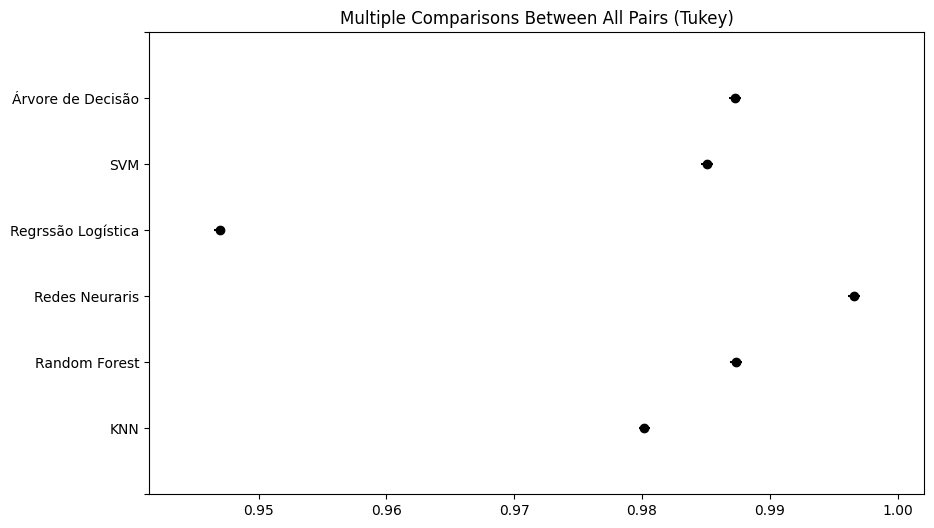

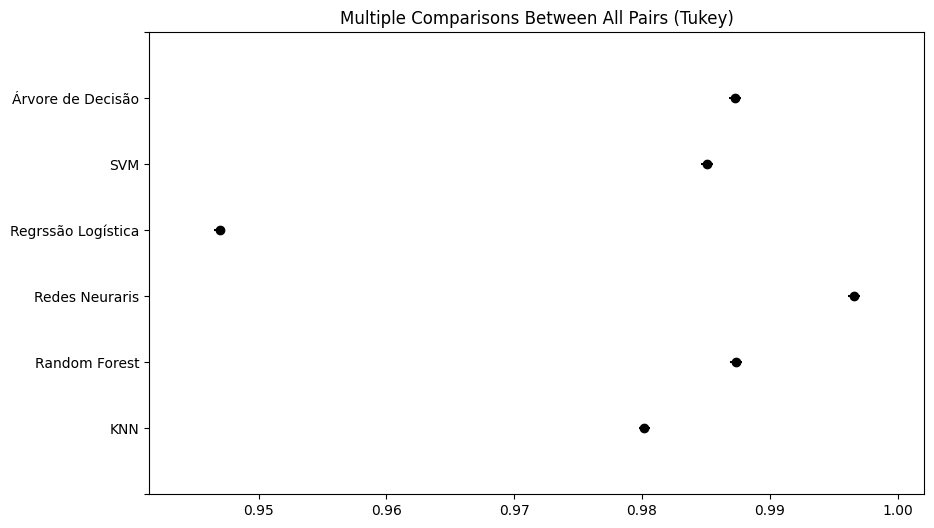

In [ ]:
teste_estatistico.plot_simultaneous()

# **Salvando um Classificador já treinado**

É interessante só salvar o Classificador após a naálise crítica como a que foi feita agora na sessão anterior

In [ ]:
with open ('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit = np.concatenate((x_credit_treinamento,x_credit_teste), axis = 0)
y_credit = np.concatenate((y_credit_treinamento,y_credit_teste), axis = 0)

In [ ]:
x_credit.shape,y_credit.shape


((2000, 3), (2000,))

In [ ]:
# A partir do gráfico da sessão de cima, vamos importar os tres melhores algoritmos
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Como o algoritmo da Árvore e da Random Forest são estatisticamente iguais, irei ultilizar o SVM por fins educativos :)

In [ ]:
Classificador_RedeNeural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
Classificador_RedeNeural.fit(x_credit,y_credit)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(batch_size=56)

In [ ]:
Classificador_RandomForest = RandomForestClassifier(criterion = 'entropy',min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
Classificador_RandomForest.fit(x_credit,y_credit)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
Classificador_SVM = SVC(C = 1.5, kernel = 'rbf', tol = 0.0001, probability = True)
Classificador_SVM.fit(x_credit,y_credit)

SVC(C=1.5, probability=True, tol=0.0001)

In [ ]:
import pickle
# O arquivo deve ser salvo como .sav para manter o formato ultilizado pelo SKLEARN
pickle.dump(Classificador_RedeNeural, open('Classificador_RedesNeurais_FINALIZADO.sav', 'wb'))
pickle.dump(Classificador_RandomForest, open('Classificador_RandomForest_FINALIZADO.sav', 'wb'))
pickle.dump(Classificador_SVM, open('Classificador_SVM_FINALIZADO.sav', 'wb'))

# **Carregando um Classificador já treinado**

In [ ]:
RedeNeural = pickle.load(open('Classificador_RedesNeurais_FINALIZADO.sav', 'rb'))
RandomForest = pickle.load(open('Classificador_RandomForest_FINALIZADO.sav', 'rb'))
SVM = pickle.load(open('Classificador_SVM_FINALIZADO.sav', 'rb'))

In [ ]:
novo_registro = x_credit[0]
novo_registro

array([-1.3754462 ,  0.50631087,  0.10980934])

In [ ]:
novo_registro.shape

(3,)

In [ ]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape
#neste bloco estamos transformando o registro em duas dimensões para que o algoritmo possa ser executado nela

(1, 3)

In [ ]:
novo_registro

array([[-1.3754462 ,  0.50631087,  0.10980934]])

In [ ]:
RedeNeural.predict(novo_registro)

array([0])

In [ ]:
RandomForest.predict(novo_registro)

array([0])

In [ ]:
SVM.predict(novo_registro)

array([0])

Como os registros foram 0 representa que o cliente pagaria o emprestimo, caso fosse 1 ele não pagaria

# **Combinação de Classificadores**

 Com a combinação de algoritmos pode-se usar mais de um para criterios de desempate e para aperfeicoar a resposta final do programa

In [ ]:
novo_registro = x_credit[1999]
novo_registro

array([-1.03572293, -0.93978122,  0.04244312])

In [ ]:

novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape
#neste bloco estamos transformando o registro em duas dimensões para que o algoritmo possa ser executado nela

(1, 3)

In [ ]:
resposta_RedeNeural = RedeNeural.predict(novo_registro)
resposta_RandomForest = RandomForest.predict(novo_registro)
resposta_SVM = SVM.predict(novo_registro)

In [ ]:
RedeNeural.predict(novo_registro),RandomForest.predict(novo_registro),SVM.predict(novo_registro)

(array([1]), array([1]), array([1]))

In [ ]:
paga = 0
nao_paga = 0

if resposta_RedeNeural[0] == 1:
  nao_paga = nao_paga + 1
else:
  paga = paga + 1

if resposta_RandomForest[0] == 1:
  nao_paga = nao_paga + 1
else:
  paga = paga + 1

if resposta_SVM[0] == 1:
  nao_paga = nao_paga + 1
else:
  paga = paga + 1

if paga > nao_paga:
  print('Cliente pagrá o empréstimo')
elif paga == nao_paga:
  print('Empate')
else:
  print('Cliente não pagrá o empréstimo')

Cliente não pagrá o empréstimo


# **Rejeição de Classificadores**

Caso o Programa não tenha a total certeza e confiança de uma resposta, exemplo uma resposta que teve 51% de precisão, o programa ultiliza a rejeição de classificadores, ou seja ele desconsidera o classificador que deu o resultado impreciso

In [ ]:
novo_registro = x_credit[1999]
novo_registro


novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape
#neste bloco estamos transformando o registro em duas dimensões para que o algoritmo possa ser executado nela

resposta_RedeNeural = RedeNeural.predict(novo_registro)
resposta_RandomForest = RandomForest.predict(novo_registro)
resposta_SVM = SVM.predict(novo_registro)

RedeNeural.predict(novo_registro),RandomForest.predict(novo_registro),SVM.predict(novo_registro)

(array([1]), array([1]), array([1]))

In [ ]:
probabilidade_RedeNeural = RedeNeural.predict_proba(novo_registro)
probabilidade_RedeNeural

array([[1.00000000e+00, 1.18179097e-17]])

In [ ]:
confianca_RedeNeural = probabilidade_RedeNeural.max()
confianca_RedeNeural

1.0

In [ ]:
probabilidade_RandomForest = RandomForest.predict_proba(novo_registro)
probabilidade_RandomForest


array([[1., 0.]])

In [ ]:
confianca_RandomForest = probabilidade_RandomForest.max()
confianca_RandomForest

1.0

In [ ]:
probabilidade_SVM = SVM.predict_proba(novo_registro)
probabilidade_SVM

array([[9.99997645e-01, 2.35541715e-06]])

In [ ]:
confianca_SVM = probabilidade_SVM.max()
confianca_SVM

0.9999976445828491

In [ ]:
paga = 0
nao_paga = 0
confianca_minima = 0.999999
algoritmos  = 0

if confianca_RedeNeural >= confianca_minima:
  algoritmos += 1
  if resposta_RedeNeural[0] == 1:
    nao_paga = nao_paga + 1
  else:
    paga = paga + 1
if confianca_RandomForest >= confianca_minima:
  algoritmos += 1
  if resposta_RandomForest[0] == 1:
    nao_paga = nao_paga + 1
  else:
    paga = paga + 1
if confianca_SVM >= confianca_minima:
  algoritmos += 1
  if resposta_SVM[0] == 1:
    nao_paga = nao_paga + 1
  else:
    paga = paga + 1

if paga > nao_paga:
  print('Cliente pagrá o empréstimo, baseado em {} algoritmos'.format(algoritmos))
elif paga == nao_paga:
  print('Empate, baseado em {} algoritmos'.format(algoritmos))
else:
  print('Cliente não pagrá o empréstimo, baseado em {} algoritmos'.format(algoritmos))


Cliente não pagrá o empréstimo, baseado em 2 algoritmos
